In [34]:
import matplotlib.pyplot as  plt 
import numpy as np

In [35]:
import cv2

In [36]:
img = cv2.imread("./image/coin.png")

In [9]:
cv2.imshow(" ORGINAL",img)
k=cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [37]:
s= img.shape

In [38]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [12]:
cv2.imshow(" ORGINAL",img_gray)
k=cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [5]:
H = np.zeros(shape=(256,1)) #creates to 256 row with 0intensity

In [ ]:
#H

In [39]:
img_gray = cv2.convertScaleAbs(img_gray, alpha = 1.1,beta = -20)
#Convert to scalar is needed
#aipha is contrast 
#beta to brightness Goal to get light to lighter dark to darker

In [ ]:
cv2.imshow(" ORGINAL",img_gray)
k=cv2.waitKey(0)
if k == 27:
    cv2.destroyAllWindows()

In [9]:
for i in range(s[0]):
    for j in range(s[1]):
        k = img_gray[i,j]
        H[k,0] = H[k,0] +1 
        
 #TypeError: only integer scalar arrays can be converted to a scalar index       

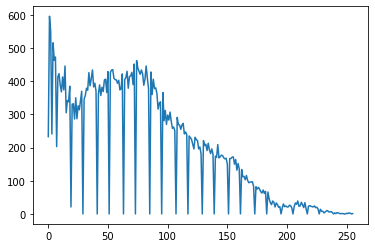

In [11]:
plt.plot(H)
plt.show()

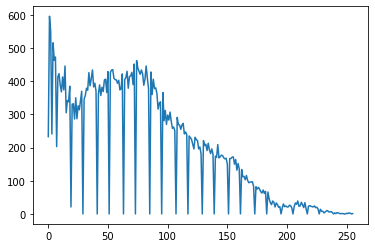

In [14]:
#now convert this into genral from

def Hist(image):
    s=image.shape
    H = np.zeros(shape=(256,1))
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k,0] = H[k,0] +1 
    return H

FH = Hist(img_gray)
plt.plot(FH)
plt.show()
#good

In [16]:
#Equalization 

histg = Hist(img_gray) #we just created



In [17]:
x = histg.reshape(1,256)
x

array([[233., 596., 551., 241., 516., 463., 473., 203., 413., 423., 388.,
        368., 413., 374., 446., 305., 342., 338., 385.,  21., 331., 332.,
        286., 350., 287., 326., 314., 341., 370.,   0., 346., 357., 379.,
        373., 426., 386., 408., 434., 383., 394., 370.,   0., 362., 389.,
        357., 382., 369., 404., 406., 366., 429.,   0., 426., 434., 435.,
        409., 405., 404., 394., 403., 374., 377., 422.,   0., 405., 411.,
        430., 379., 414., 416., 427., 390., 452.,   0., 462., 440., 430.,
        421., 434., 423., 388., 406., 446., 409., 378.,   0., 428., 360.,
        406., 378., 380., 363., 316., 334., 338.,   0., 366., 281., 312.,
        270., 298., 283., 307., 279., 258., 262., 251.,   0., 291., 269.,
        268., 255., 268., 273., 241., 247., 239.,   0., 235., 230., 225.,
        211., 196., 231., 224., 221., 196., 202., 181.,   0., 221., 206.,
        210., 191., 213., 193., 182., 196., 180.,   0., 174., 171., 209.,
        169., 172., 177., 176., 169., 

In [18]:
y= np.array([])
y

array([], dtype=float64)

In [20]:
y = np.append(y,x[0,0])

In [21]:
y

array([233.])

In [26]:
#for adding the no of pixel

for i in range(255):
    k = x[0,i+1]+y[i] 
    #print(k)#add
    y= np.append(y,k)
    #print(y)
y = np.round( ( y / (s[0] * s[1])) * 255 )   #cdf
#print(y)

[0. 0. 0. ... 0. 0. 0.]


In [29]:
# now append the new histogram

for i in range (s[0]):
    for  j in range (s[1]):
        k = img_gray[i,j]
        img_gray[i,j] = y[k]

In [31]:
cv2.imshow("eql",img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 

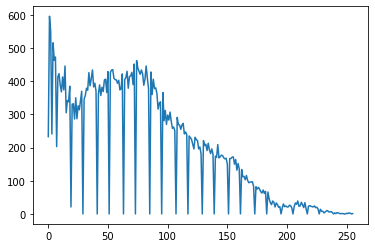

In [32]:
plt.plot(histg)

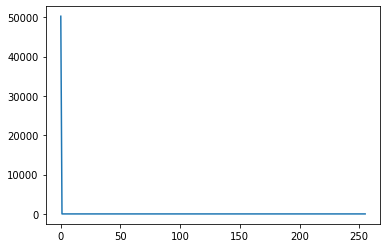

In [33]:
eql = Hist(img_gray)
plt.plot(eql)
plt.show()

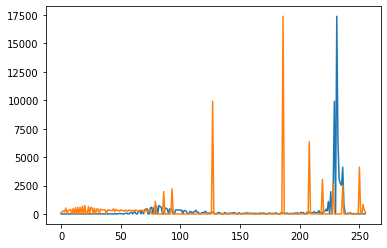

In [40]:
def Hist(image):
    s=image.shape
    H = np.zeros(shape=(256,1))
    for i in range(s[0]):
        for j in range(s[1]):
            k = image[i,j]
            H[k,0] = H[k,0] +1 
    return H

histg = Hist(img_gray)

x = histg.reshape(1,256)
y= np.array([])
y = np.append(y,x[0,0])

for i in range(255):
    k = x[0,i+1]+y[i] 
    y= np.append(y,k)
y = np.round( ( y / (s[0] * s[1])) * 255 )


for i in range (s[0]):
    for  j in range (s[1]):
        k = img_gray[i,j]
        img_gray[i,j] = y[k]
        
eql = Hist(img_gray)
plt.plot(histg)
plt.plot(eql)
plt.show()

In [41]:
cv2.imshow("eql",img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()